# Yianna Bekris
# RCES Assignment 6
# 3/26/2024

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv'
df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


In [113]:
# Get the unique values of the BASIN, SUBBASIN, and NATURE columns
pd.unique(df.BASIN)

array(['NI', 'SI', 'NA', 'EP', 'WP', 'SP', 'SA'], dtype=object)

In [114]:
pd.unique(df.SUBBASIN)

array(['BB', 'AS', 'MM', 'GM', 'NA', 'CS', 'WA', 'EA', 'CP'], dtype=object)

In [115]:
pd.unique(df.NATURE)

array(['NR', 'TS', 'ET', 'SS', 'MX', 'DS'], dtype=object)

In [116]:
# Rename the WMO_WIND and WMO_PRES columns to WIND and PRES
df = df.rename(columns={"WMO_WIND": "WIND", "WMO_PRES": "PRES"})

In [117]:
# Get the 10 largest rows in the dataset by WIND
df.nlargest(10, 'WIND')

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
666142,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 12:00:00,TS,17.3,-105.6,185.0,872.0
666140,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 06:00:00,TS,16.5,-105.4,180.0,886.0
666144,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 18:00:00,TS,18.3,-105.3,180.0,878.0
427655,1980214N11330,1980,57,NA,GM,ALLEN,1980-08-07 18:00:00,TS,21.8,-86.4,165.0,899.0
178210,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 00:00:00,TS,24.6,-80.5,160.0,892.0
178211,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 02:00:00,TS,24.8,-80.8,160.0,892.0
178213,1935241N23291,1935,46,NA,GM,NaN,1935-09-03 06:00:00,TS,25.1,-81.1,160.0,NaN
482093,1988253N12306,1988,74,NA,CS,GILBERT,1988-09-14 00:00:00,TS,19.7,-83.8,160.0,888.0
552477,1997253N12255,1997,81,EP,MM,LINDA,1997-09-12 06:00:00,TS,17.1,-109.6,160.0,902.0
605764,2005289N18282,2005,97,NA,CS,WILMA,2005-10-19 12:00:00,TS,17.3,-82.8,160.0,882.0


In [118]:
# Group the data on SID and get the 10 largest hurricanes by WIND
gb_SID = df.groupby("SID")

In [119]:
gb_SID.WIND.nlargest(10)

SID                  
1842298N11080  0        NaN
               1        NaN
               2        NaN
               3        NaN
               4        NaN
                         ..
2024076S13137  716332   NaN
               716333   NaN
               716334   NaN
               716335   NaN
               716336   NaN
Name: WIND, Length: 135759, dtype: float64

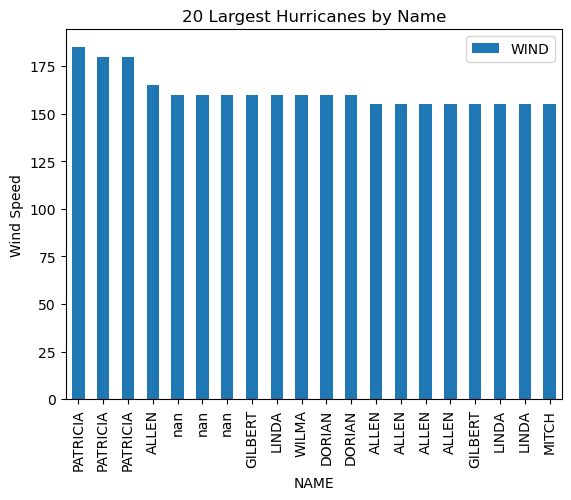

In [121]:
# Make a bar chart of the wind speed of the 20 strongest-wind hurricanes
df.nlargest(20, "WIND").plot(kind="bar", x="NAME", y="WIND");
plt.title("20 Largest Hurricanes by Name");
plt.ylabel("Wind Speed");

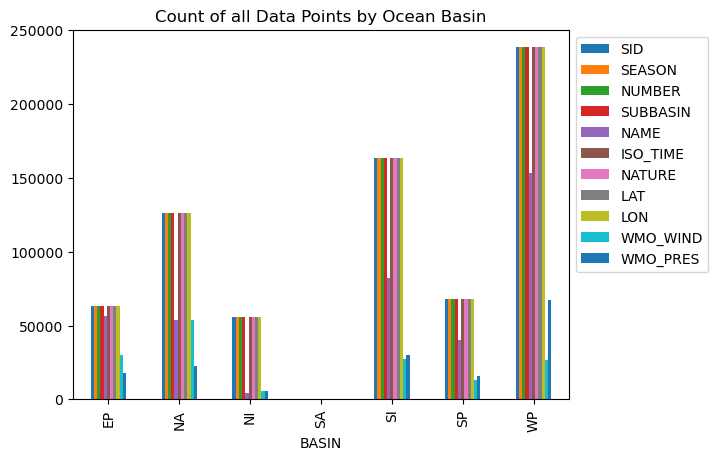

In [95]:
# Plot the count of all datapoints by Basin
df.groupby("BASIN").count().plot(kind="bar");
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0));
plt.title("Count of all Data Points by Ocean Basin");

<Axes: xlabel='BASIN'>

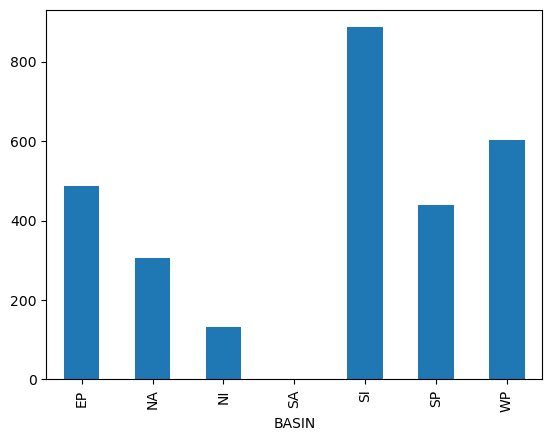

In [135]:
# Plot the count of unique hurricanes by Basin
uniq_hurr = df.groupby("BASIN")["NAME"].nunique():
uniq_hurr.plot(kind="bar"):

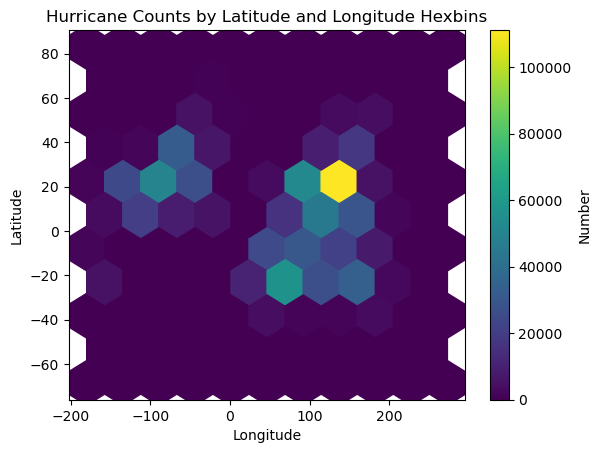

In [105]:
# Make a hexbin of the location of datapoints in Latitude and Longitude
plt.hexbin(x=df['LON'], y=df['LAT'], gridsize=10, cmap="viridis");
plt.title("Hurricane Counts by Latitude and Longitude Hexbins");
colorbar = plt.colorbar(label='Number');
plt.xlabel("Longitude");
plt.ylabel("Latitude");

plt.show()

In [13]:
# Find Hurricane Katrina (from 2005) and plot its track as a scatter plot
katrina = df[df["NAME"] == "KATRINA"]
pd.unique(katrina["SID"])

array(['1967242N18253', '1971221N15263', '1975241N10260', '1981307N17279',
       '1998002S14151', '1999302N11279', '2005236N23285'], dtype=object)

In [14]:
katrina = katrina[katrina["SID"] == '2005236N23285']

<Axes: xlabel='LON', ylabel='LAT'>

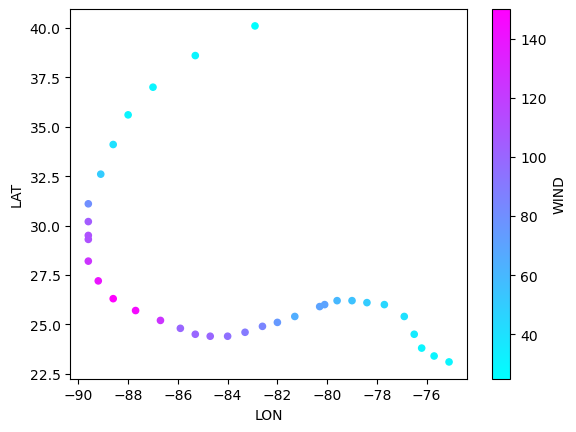

In [15]:
katrina.plot.scatter("LON", "LAT", c="WIND", colormap="cool")

In [16]:
# Make time the index on your dataframe
df = df.set_index("ISO_TIME")
katrina = katrina.set_index("ISO_TIME")

In [17]:
# Plot the count of all datapoints per year as a timeseries
df_count = df.NUMBER.resample('1YE').count()

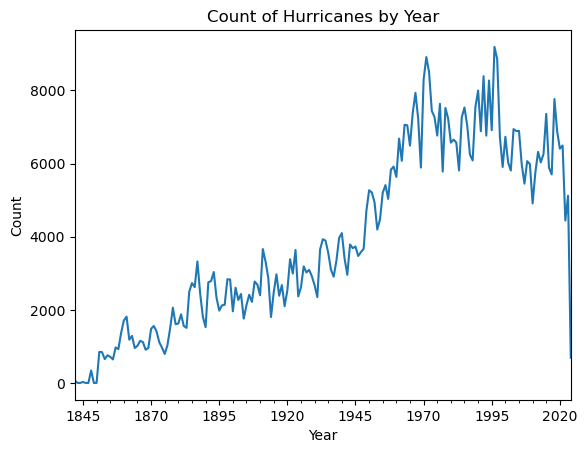

In [106]:
df_count.plot();
plt.title("Count of Hurricanes by Year");
plt.ylabel("Count");
plt.xlabel("Year");

In [19]:
# Plot all tracks from the North Atlantic in 2005
NA_2005 = df[(df.SUBBASIN == "NA") & (df.SEASON == 2005)]
NA_2005_SIDs = pd.unique(NA_2005.SID)

/tmp/ipykernel_721834/4093472597.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', num_groups)


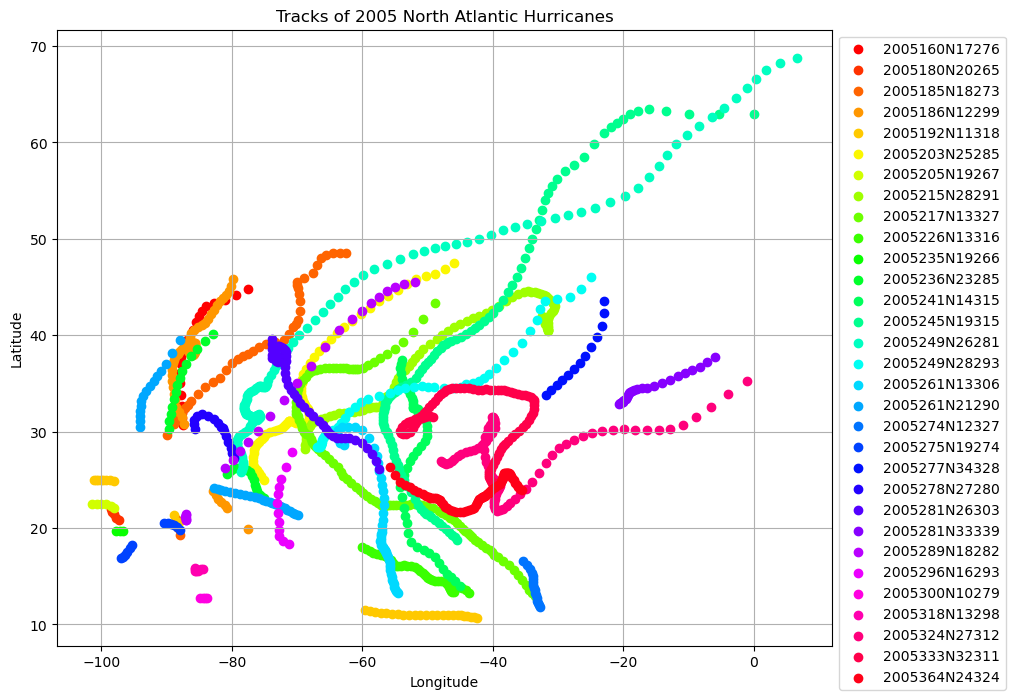

In [126]:
gb_NA_2005 = NA_2005.groupby("SID")

plt.figure(figsize=(10, 8))

num_groups = len(gb_NA_2005)
cmap = plt.cm.get_cmap('hsv', num_groups)

for i, (sid, group) in enumerate(gb_NA_2005):
    plt.scatter(group['LON'], group['LAT'], color=cmap(i), label=sid)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Tracks of 2005 North Atlantic Hurricanes')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0));
plt.grid(True)

plt.show()

In [21]:
# Create a filtered dataframe that contains only data since 1970 from the North Atlantic (“NA”) Basin
NA_1970 = df[(df.SUBBASIN == "NA") & (df.SEASON >= 1970)]

In [67]:
# Plot the number of datapoints per day from this filtered dataframe
NA_1970_day_counts = NA_1970.groupby(NA_1970.index.date).size()
NA_1970_day_counts.head()

1970-05-25    6
1970-05-26    8
1970-05-27    1
1970-07-22    4
1970-07-23    5
dtype: int64

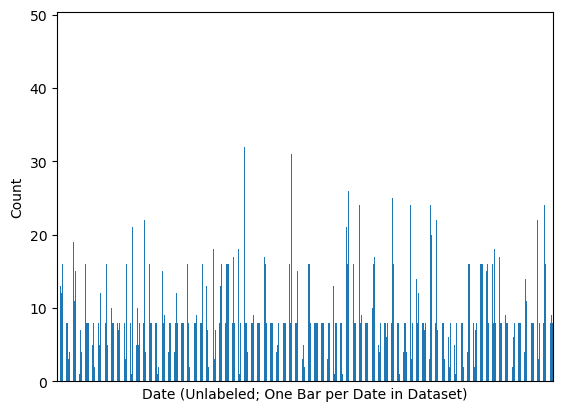

In [84]:
NA_1970_day_counts.plot(kind="bar", xticks=[]);
plt.xlabel("Date (Unlabeled; One Bar per Date in Dataset)");
plt.ylabel("Count");

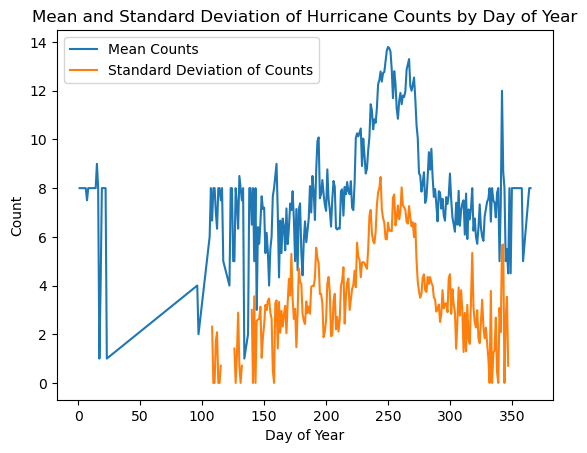

In [81]:
# Calculate the climatology of datapoint counts as a function of dayofyear
doy_counts_clim = NA_1970_day_counts.groupby(NA_1970_day_counts.index.dayofyear).mean()
doy_counts_std = NA_1970_day_counts.groupby(NA_1970_day_counts.index.dayofyear).std()
doy_counts_clim.plot(label="Mean Counts");
doy_counts_std.plot(label="Standard Deviation of Counts");
plt.legend();
plt.xlabel("Day of Year");
plt.ylabel("Count")
plt.title("Mean and Standard Deviation of Hurricane Counts by Day of Year");

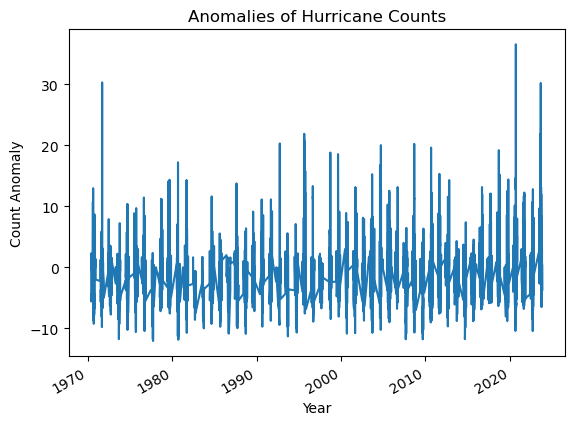

In [82]:
# Use transform to calculate the anomaly of daily counts from the climatology
anom = NA_1970_day_counts.groupby(NA_1970_day_counts.index.dayofyear).transform(lambda x: x - x.mean())
anom.plot()
plt.xlabel("Year")
plt.ylabel("Count Anomaly")
plt.title("Anomalies of Datapoint Counts");

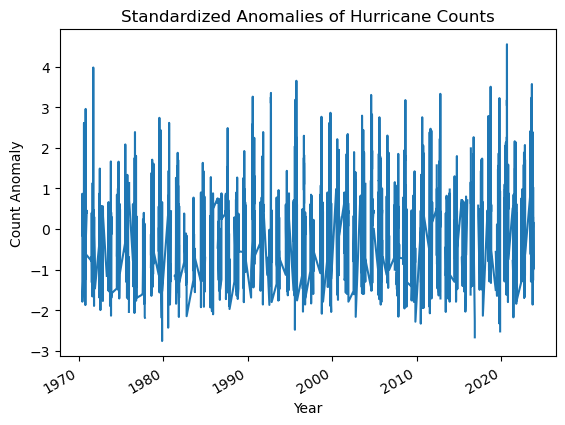

In [137]:
# Just for fun here are standardized anomalies
std_anom = NA_1970_day_counts.groupby(NA_1970_day_counts.index.dayofyear).transform(lambda x: (x - x.mean()) / x.std())
std_anom.plot()
plt.xlabel("Year")
plt.ylabel("Count Anomaly")
plt.title("Standardized Anomalies of Datapoint Counts");